In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Implement K-means clustering for iris data set. Iris data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris setosa, versicolor, and virginica  

In [3]:
df=pd.read_csv("IRIS.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X=df.iloc[:,:-1].values

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
X=scaler.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'The Elbow method')

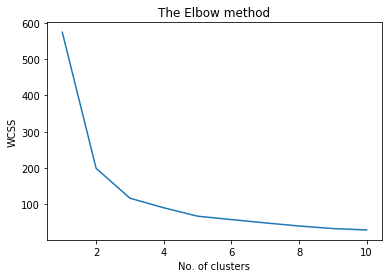

In [12]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow method")

In [13]:
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

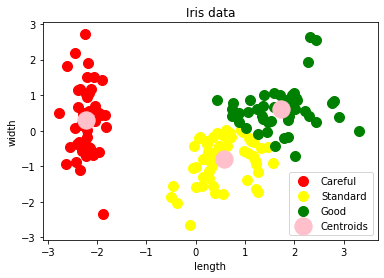

In [14]:
y_means=kmeans.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='yellow',label='Standard')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='green',label='Good')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='pink',label='Centroids')
plt.title('Iris data')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()
plt.show()